In [1]:
%reload_ext autoreload
%autoreload 2


import numpy as np
import pandas as pd

from Modeling import * 

%matplotlib inline

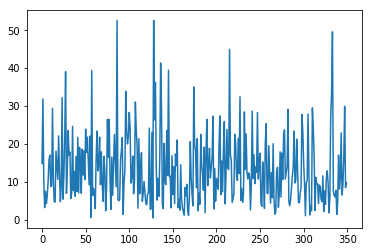

In [2]:
# Define Time Series

#x=np.hstack([   2*np.ones([1,100]), 3*np.ones([1,300]),   2*np.ones([1,500]),3*np.ones([1,300]),   5*np.ones([1,300])])+2*np.random.rand(1,1500) 
#K=3
#C=4

#x=np.hstack([   2*np.arange(0,201)+3,   -4*np.arange(201,501)+90,2*np.arange(501,801)-240,6*np.arange(801,1300)-300  ])  + 500*np.random.rand(1,1300) 
#K=4
#C=3
# 

x=np.hstack([ np.random.gamma(3, 5, [1,70]) , np.random.gamma(2, 6, [1,130]),np.random.gamma(3, 5, [1,50]) ,  np.random.gamma(2, 6, [1,100] ) ])
#stats.gamma.rvs(a=3, loc=0, scale=2, size=100) 
K=2
C=3


#x=np.hstack([np.random.poisson(3.2, [1,70]) , np.random.poisson(7.7, [1,70]), np.random.poisson(3.2, [1,70]) , np.random.poisson(5, [1,70])])
#K=3
#C=3

#t=np.arange(0,150)
#u1=np.sin(.1*t)
#u2=t
#u=np.vstack([u1,u2]).transpose()
#x=np.hstack([np.random.poisson(3*u1[0:90]+.3*u2[0:90]+4, [1,90]) , np.random.poisson(.1*u2[90:150]+2, [1,60])])
#K=2
#C=1

plt.plot(x.transpose())

# GACD

In [3]:
PopSize = 50
NumGen = 1400

#model='K-means'
#model='Linear-Trend'
#model='Univariate-Gaussian'
model = 'Gamma'
#model = 'Poisson'
#model = 'Poisson-GLM'

The GACD algorithm converged in 18.0 seconds and in 1400 generations
The best switch times are [115, 182, 302] and the best regime order is [0, 1, 0, 1]
The minimum reached cost function is -13.5939613018


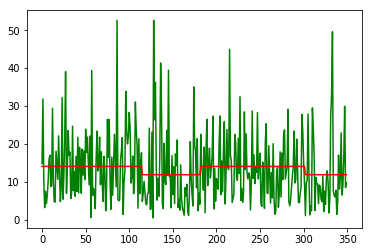

In [4]:
#u=np.matrix(np.arange(0,150))
#u1_ = np.matrix(u1).transpose()

Theta, MinFit = GACD(x, K=K, C=C, PopSize=PopSize, NumGen=NumGen, model=model)

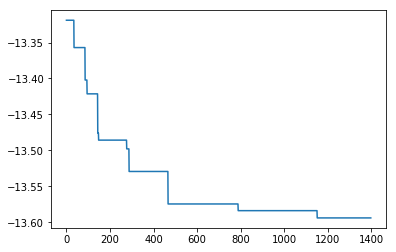

In [5]:
plt.plot(MinFit)

In [18]:
K=2
C=1

IndividualTimes=[200]
IndividualRegimes=[0,1]
T=350
RMF=np.zeros([K,T])
IndividualTimes=np.hstack([0,IndividualTimes,T])
for c in range(0,C+1):
    RMF[IndividualRegimes[c],np.arange(int(IndividualTimes[c]),int(IndividualTimes[c+1]))]= 1
    
output =np.array([ModelIt(x[0,RMF[k]==1],np.arange(0,T)[RMF[k]==1],T=T,model=model) for k in range(0,K)])
#Error = np.sum(output[:,1])
#Theta = np.vstack(output[:,0])
#muhat = (np.matrix(Theta[:,0])*RMF).sum(axis=0)

#a= np.matrix(Theta[:,0]).transpose() * np.matrix(np.arange(0,T)) + np.matrix(Theta[:,1]).transpose() 
#muhat=np.multiply(a,RMF).sum(axis=0)
#a.shape, RMF.shape

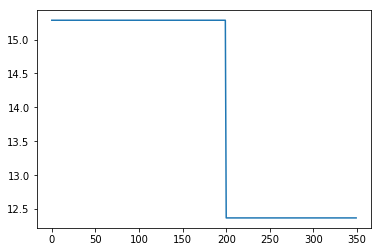

In [34]:
Theta = np.vstack(output[:,0])
a=(np.multiply(np.matrix(Theta[:,0])  , np.matrix(Theta[:,2]) )*RMF).sum(axis=0)
plt.plot(a.transpose())

In [23]:
output

array([[[3.3613242281233395, 0, 4.5472957791031501], -7.6898660239820433],
       [[1.6708744406617917, 0, 7.4036118073071471], -5.8977317837855443]], dtype=object)

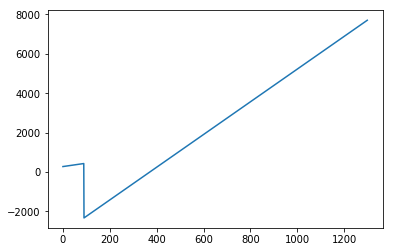

In [197]:
output=np.array([ModelIt(x[0,RMF[k]==1],np.arange(0,T)[RMF[k]==1],T=T,model=model) for k in range(0,K)])
np.array([output[0,0],output[1,0]] )
#Theta = np.array(output)
#Theta[0][0]
#np.matrix(Theta[:,0]).transpose() * np.matrix(np.arange(0,T)) + np.matrix(Theta[:,1]).transpose()

#np.reshape(np.matrix(Theta),[2,2])
#k=1
#ModelIt(x[0,RMF[k]==1],np.arange(0,T)[RMF[k]==1],T=T,model=model)
#np.arange(0,T)[RMF[k]==1]
#plt.plot(np.multiply(np.matrix(output[:,0]).transpose(),RMF).sum(axis=0).transpose())

array([[  2.16790351e+00,   2.65741525e+02],
       [  8.31919765e+00,  -3.08807378e+03]])

In [195]:
output[1,0]

[8.3191976527456752, -3088.0737772167404]

In [184]:
plt.plot(muhat.transpose())
plt.plot(x.transpose(),'r')
#plt.plot(RMF.transpose(),'r')

NameError: name 'muhat' is not defined

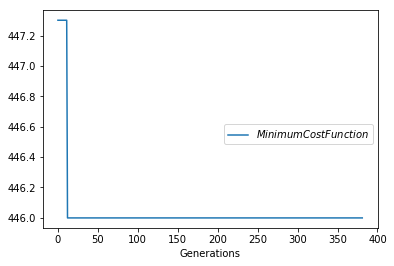

In [101]:
plt.plot(MinFit, label = r'$Minimum Cost Function$')
plt.xlabel('Generations')
plt.legend(bbox_to_anchor=(1, 0.5))

In [69]:
import numpy as np
import scipy.sparse as sps
from sklearn.preprocessing import StandardScaler
from pyglmnet import GLM

# create an instance of the GLM class
glm = GLM(distr='poisson')

n_samples, n_features = 10000, 100

# sample random coefficients
beta0 = np.random.normal(0.0, 1.0, 1)
beta = sps.rand(n_features, 1, 0.1)
beta = np.array(beta.todense())

# simulate training data
X_train = np.random.normal(0.0, 1.0, [n_samples, n_features])
y_train = glm.simulate(beta0, beta, X_train)

# simulate testing data
X_test = np.random.normal(0.0, 1.0, [n_samples, n_features])
y_test = glm.simulate(beta0, beta, X_test)

# fit the model on the training data
scaler = StandardScaler().fit(X_train)
glm.fit(scaler.transform(X_train), y_train)

# predict using fitted model on the test data
yhat_test = glm.predict(scaler.transform(X_test))

# score the model
deviance = glm.score(X_test, y_test)

In [78]:
from sklearn.cross_validation import train_test_split
from pyglmnet import GLM, datasets
X, y = datasets.fetch_community_crime_data('/1')
n_samples, n_features = X.shape
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=0)
# use the default value for reg_lambda
glm = GLM(distr='gaussian', alpha=0.05, score_metric='pseudo_R2')

# fit model
glm.fit(X_train, y_train)

# score the test set prediction
y_test_hat = glm[-1].predict(X_test)
print ("test set pseudo $R^2$ = %f" % glm[-1].score(X_test, y_test))


AttributeError: module 'urllib' has no attribute 'urlretrieve'

In [7]:
! ls ..

'ls' is not recognized as an internal or external command,
operable program or batch file.
